In [1]:
import numpy as np
import os
import scipy
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA, FastICA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, plot_roc_curve
from imblearn.over_sampling import SMOTE

plt.style.use('seaborn')
%matplotlib inline

In [2]:
PATH = "/Users/mazeyu/Desktop/CMU/20fall/18797/project/features"

In [3]:
train_x = np.load(os.path.join(PATH, 'train_x.npy'), allow_pickle=True)
train_y = np.load(os.path.join(PATH, 'train_y.npy'), allow_pickle=True)
dev1_x = np.load(os.path.join(PATH, 'd1_x.npy'), allow_pickle=True)
dev1_y = np.load(os.path.join(PATH, 'd1_y.npy'), allow_pickle=True)
dev2_x = np.load(os.path.join(PATH, 'd2_x.npy'), allow_pickle=True)
dev2_y = np.load(os.path.join(PATH, 'd2_y.npy'), allow_pickle=True)
test_x = np.load(os.path.join(PATH, 'test_x.npy'), allow_pickle=True)
test_y = np.load(os.path.join(PATH, 'test_y.npy'), allow_pickle=True)

In [4]:
smote = SMOTE(random_state=0)
balance_x, balance_y = smote.fit_resample(train_x, train_y)

In [5]:
print('train:', train_x.shape, train_y.shape)
print('dev1:', dev1_x.shape, dev1_y.shape)
print('dev2:', dev2_x.shape, dev2_y.shape)
print('test:', test_x.shape, test_y.shape)
print('balance:', balance_x.shape, balance_y.shape)

train: (5400, 4368) (5400,)
dev1: (3960, 4368) (3960,)
dev2: (1500, 4368) (1500,)
test: (3000, 4368) (3000,)
balance: (7200, 4368) (7200,)


In [6]:
pca = PCA(n_components=50)
pca.fit(train_x)
train_x = pca.transform(train_x)
balance_x = pca.transform(balance_x)
dev1_x = pca.transform(dev1_x)
dev2_x = pca.transform(dev2_x)
test_x = pca.transform(test_x)

In [ ]:
ica = FastICA(n_components=50)
ica.fit(train_x)
train_x = ica.transform(train_x)
balance_x = ica.transform(balance_x)
dev1_x = ica.transform(dev1_x)
dev2_x = ica.transform(dev2_x)
test_x = ica.transform(test_x)

In [16]:
class ALCModel:
    def __init__(self, method, verbose=None):
        if method == 'logistic':
            if verbose is None:
                verbose = 0
            self.clf = LogisticRegression(C=1.0)
        elif method == 'neighbor':
            self.clf = KNeighborsClassifier(n_neighbors=5, leaf_size=30)
        elif method == 'svm':
            if verbose is None:
                verbose = False
            self.clf = SVC(C=1.0, kernel='rbf', verbose=verbose)
        elif method == 'linear_svm':
            if verbose is None:
                verbose = 0
            self.clf = LinearSVC(C=1.0, verbose=verbose)
        elif method == 'forest':
            if verbose is None:
                verbose = 0
            self.clf = RandomForestClassifier(n_estimators=200, verbose=verbose)
        elif method == 'adaboost':
            self.clf = AdaBoostClassifier(n_estimators=100)
        elif method == 'gradboost':
            if verbose is None:
                  verbose = False
            self.clf = GradientBoostingClassifier(n_estimators=100, verbose=verbose)
        else:
            pass
        
    def fit(self, x, y):
        self.clf.fit(x, y)
    
    def predict(self, x):
        prediction = self.clf.predict(x)
        return prediction
    
    def evaluate(self, x, label, roc=False):
        pred = self.predict(x)
        acc = np.mean(pred == label)
        report = sklearn.metrics.classification_report(label, pred)
        if roc:
            curve = plot_roc_curve(self.clf, x, label)
            plt.show()
        return acc, report

In [ ]:
model = ALCModel('logistic')
model.fit(balance_x, balance_y)
acc, report = model.evaluate(test_x, test_y, roc=True)
print(report)

In [ ]:
model = ALCModel('neighbor')
model.fit(balance_x, balance_y)
acc, report = model.evaluate(test_x, test_y, roc=True)
print(report)

In [ ]:
model = ALCModel('svm')
model.fit(balance_x, balance_y)
acc, report = model.evaluate(test_x, test_y, roc=True)
print(report)

In [ ]:
model = ALCModel('linear_svm')
model.fit(balance_x, balance_y)
acc, report = model.evaluate(test_x, test_y, roc=True)
print(report)

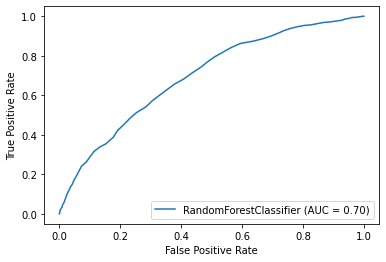

              precision    recall  f1-score   support

           0       0.61      0.72      0.66      1500
           1       0.66      0.54      0.59      1500

    accuracy                           0.63      3000
   macro avg       0.63      0.63      0.63      3000
weighted avg       0.63      0.63      0.63      3000



In [12]:
model = ALCModel('forest')
model.fit(balance_x, balance_y)
acc, report = model.evaluate(test_x, test_y, roc=True)
print(report)

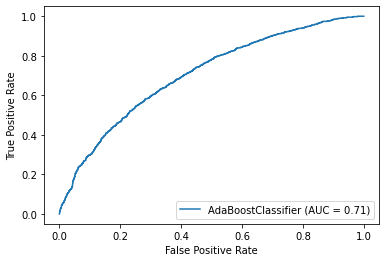

              precision    recall  f1-score   support

           0       0.65      0.64      0.65      1500
           1       0.65      0.65      0.65      1500

    accuracy                           0.65      3000
   macro avg       0.65      0.65      0.65      3000
weighted avg       0.65      0.65      0.65      3000



In [13]:
model = ALCModel('adaboost')
model.fit(balance_x, balance_y)
acc, report = model.evaluate(test_x, test_y, roc=True)
print(report)

In [ ]:
model = ALCModel('gradboost', verbose=True)
model.fit(balance_x, balance_y)
acc, report = model.evaluate(test_x, test_y, roc=True)
print(report)